<a href="https://colab.research.google.com/github/mihika632/DS_ML/blob/main/PlacementPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

Saving placement.csv to placement.csv


In [5]:
df = pd.read_csv('placement.csv')


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt


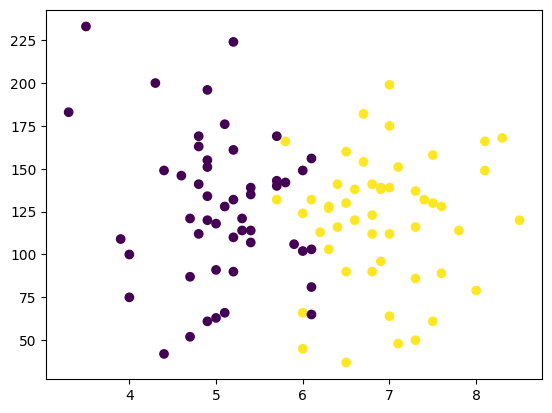

In [10]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [11]:
X = df.iloc[:, 0:2]
Y = df.iloc[:,-1]
X
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.1)
#  //0.1 -> 10% testing,  90%training

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 1.17255835e+00,  3.36361220e-01],
       [-1.12927599e+00, -1.84798796e+00],
       [-6.86615542e-01, -8.71455386e-01],
       [-1.21780808e+00,  5.67645251e-01],
       [ 9.95494166e-01, -1.95078086e+00],
       [ 8.18429987e-01, -7.17266032e-01],
       [ 2.87237447e-01, -5.37378452e-01],
       [-2.19166107e+00,  2.80339088e+00],
       [ 6.41365807e-01,  7.73231057e-01],
       [ 8.18429987e-01,  3.62059446e-01],
       [-1.83753271e+00, -3.83189098e-01],
       [-8.63679721e-01, -1.56530748e+00],
       [ 1.10173267e-01, -1.51391103e+00],
       [-9.52211811e-01, -1.00508616e-01],
       [-9.52211811e-01, -1.61670393e+00],
       [ 3.75769537e-01,  4.39154123e-01],
       [-5.98083452e-01, -2.54697970e-01],
       [ 1.88081507e+00,  6.44739928e-01],
       [ 1.17255835e+00, -1.89938441e+00],
       [ 1.10173267e-01,  8.24627508e-01],
       [ 1.43815462e+00,  1.05077189e-01],
       [-6.86615542e-01,  9.53118637e-01],
       [-5.09551362e-01,  3.87757672e-01],
       [-1.

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9

<Axes: >

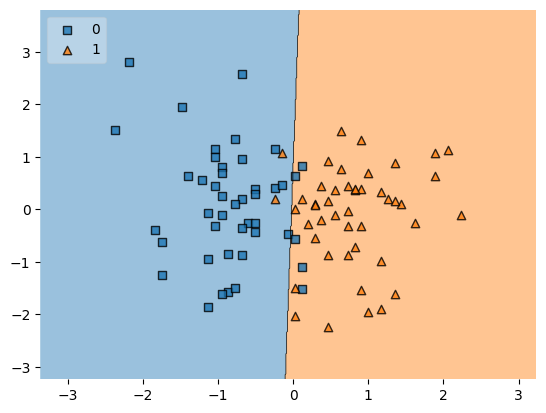

In [23]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X_train, y=Y_train.values, clf=clf, legend=2)


In [25]:
import pickle
# converts to file
pickle.dump(clf, open('model.pkl', 'wb'))